In [11]:
import pandas as pd
import numpy as np
import math

In [12]:
data_file = pd.read_csv('result3.csv')

In [13]:
data_file.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,year,quart,return,last_return
count,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,...,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000,26862.000000
mean,1.934676,1.909732,22.233223,2.926143,14.428193,21.988104,84.557912,51.578900,6.046190,28.381086,...,3.543460,4.363080,1.619221,1.491252,1.409777,0.915031,2013.203820,2.516454,1.035751,1.031672
std,1.786361,1.763966,16.763664,2.784431,12.565569,22.502162,66.569252,46.054232,5.533868,28.657611,...,4.993376,6.211652,1.014030,0.980491,1.035513,0.624531,4.069402,1.129035,0.162546,0.158276
min,-1.100000,-1.070000,-5.990000,-1.700000,-7.440000,-9.460000,-47.830000,-55.992500,-2.710000,-39.430000,...,-2.720000,-2.880000,-0.290000,0.000500,-0.280000,-0.060000,2006.000000,1.000000,0.127124,0.127124
25%,0.640000,0.630000,9.810000,0.860000,4.520000,5.500000,32.710000,9.972500,1.750000,1.260000,...,0.380000,0.440000,0.830000,0.790000,0.640000,0.480000,2010.000000,2.000000,0.952890,0.953180
50%,1.510000,1.480000,17.710000,2.140000,10.500000,12.980000,72.980000,42.955000,3.980000,21.605000,...,1.930000,2.100000,1.390000,1.190000,1.100000,0.750000,2013.000000,3.000000,1.039123,1.033885
75%,2.910000,2.870000,31.540000,4.400000,21.017500,31.747500,123.770000,78.367500,8.440000,50.600000,...,6.010000,7.097500,2.180000,2.030000,1.900000,1.240000,2017.000000,4.000000,1.120891,1.116083
max,5.710000,5.650000,59.200000,8.920000,42.052500,69.282500,225.350000,149.192500,17.360000,108.590000,...,14.170000,17.092500,3.760000,3.710000,3.500000,2.220000,2020.000000,4.000000,3.239215,2.890282


In [14]:
data_test = data_file[data_file['year']>=2017]
data_train = data_file[data_file['year']<2017]

In [15]:
all_input = data_file.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
all_output = data_file['return']
inputall = np.array(all_input)
outputall = np.array(all_output)

In [16]:
train_input = data_train.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
train_output = data_train['return']
inputtrain = np.array(train_input)
outputtrain = np.array(train_output)

In [17]:
test_input = data_test.drop('return',axis=1).drop('year',axis=1).drop('quart',axis=1)
test_output = data_test['return']
inputtest = np.array(test_input)
outputtest = np.array(test_output)

In [18]:
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
lambda_reg = 0.001

In [44]:
model = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [45]:
inputtrain = inputtrain.astype('float64')
history = model.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 1s 50us/sample - loss: 0.3202 - mae: 0.2298 - mse: 0.1107
Epoch 2/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.2342 - mae: 0.1310 - mse: 0.0301
Epoch 3/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.2264 - mae: 0.1242 - mse: 0.0273
Epoch 4/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.2200 - mae: 0.1197 - mse: 0.0258
Epoch 5/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.2143 - mae: 0.1172 - mse: 0.0247
Epoch 6/500
19725/19725 [==============================] - 1s 34us/sample - loss: 0.2092 - mae: 0.1153 - mse: 0.0242
Epoch 7/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.2044 - mae: 0.1138 - mse: 0.0238
Epoch 8/500
19725/19725 [==============================] - 1s 32us/sample - loss: 0.1994 - mae: 0.1122 - mse: 0.0232
Epoch 9/500
19725/19725 [================

[0.04194612750000349, 0.1428659, 0.041065358]

In [46]:
model1 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model1.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model1.summary()
inputtrain = inputtrain.astype('float64')
history1 = model1.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model1.evaluate(inputtest, outputtest)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 96us/sample - loss: 0.6574 - ma

[0.1038713968765156, 0.14320946, 0.041242816]

In [47]:
model2 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model2.compile(optimizer=tf.keras.optimizers.SGD(0.0005),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model2.summary()
inputtrain = inputtrain.astype('float64')
history2 = model2.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model2.evaluate(inputtest, outputtest)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 82us/sample - loss: 0.7092 - m

[0.15629736491928786, 0.14370844, 0.041451205]

In [48]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.0001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model3.summary()
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 114us/sample - loss: 0.8366 - 

[0.22716624778835684, 0.14320055, 0.04118957]

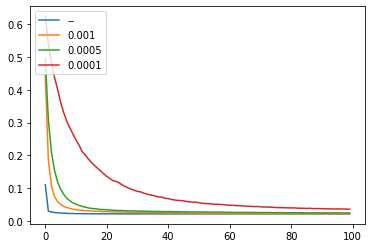

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][0:100])
plt.plot(history1.history['mse'][0:100])
plt.plot(history2.history['mse'][0:100])
plt.plot(history3.history['mse'][0:100])
plt.legend(['--','0.001','0.0005','0.0001'], loc='upper left')
plt.savefig("sigmoid_lr.png")
plt.show()

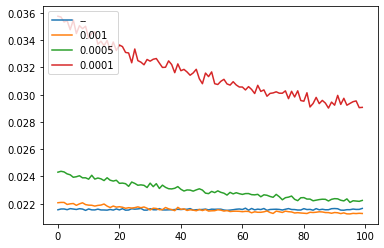

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][100:200])
plt.plot(history1.history['mse'][100:200])
plt.plot(history2.history['mse'][100:200])
plt.plot(history3.history['mse'][100:200])
plt.legend(['--','0.001','0.0005','0.0001'], loc='upper left')
plt.savefig("sigmoid_lr2.png")
plt.show()

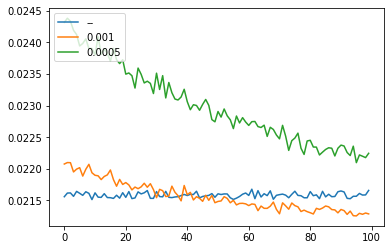

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'][100:200])
plt.plot(history1.history['mse'][100:200])
plt.plot(history2.history['mse'][100:200])
plt.legend(['--','0.001','0.0005'], loc='upper left')
plt.savefig("sigmoid_lr3.png")
plt.show()

In [17]:
lambda_reg = 0.001

In [18]:
model3 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model3.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error', 
             metrics=['mae','mse'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [19]:
inputtrain = inputtrain.astype('float64')
history3 = model3.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model3.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 3s 177us/sample - loss: 0.9308 - mae: 0.6759 - mse: 0.7174s - loss: 0.9370 - mae: 0.6787 - mse:
Epoch 2/500
19725/19725 [==============================] - 2s 106us/sample - loss: 0.8115 - mae: 0.6209 - mse: 0.6004
Epoch 3/500
19725/19725 [==============================] - 2s 110us/sample - loss: 0.7348 - mae: 0.5795 - mse: 0.5260
Epoch 4/500
19725/19725 [==============================] - 2s 104us/sample - loss: 0.6408 - mae: 0.5255 - mse: 0.4343
Epoch 5/500
19725/19725 [==============================] - 2s 112us/sample - loss: 0.5736 - mae: 0.4842 - mse: 0.3694
Epoch 6/500
19725/19725 [==============================] - 2s 100us/sample - loss: 0.5131 - mae: 0.4457 - mse: 0.3113
Epoch 7/500
19725/19725 [==============================] - 2s 104us/sample - loss: 0.4645 - mae: 0.4096 - mse: 0.2651
Epoch 8/500
19725/19725 [==============================] - 2s 123us/sample - loss: 0.4167 - mae: 0.3715 - mse: 0.2

[0.0417977216325599, 0.14365639, 0.04143335]

In [20]:
lambda_reg = 0.01

In [21]:
model4 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model4.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [22]:
inputtrain = inputtrain.astype('float64')
history4 = model4.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model4.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 108us/sample - loss: 3.0779 - mae: 0.7898 - mse: 0.9814
Epoch 2/2000
19725/19725 [==============================] - 1s 68us/sample - loss: 2.5925 - mae: 0.6063 - mse: 0.5798
Epoch 3/2000
19725/19725 [==============================] - 1s 68us/sample - loss: 2.4294 - mae: 0.5690 - mse: 0.5102
Epoch 4/2000
19725/19725 [==============================] - 1s 69us/sample - loss: 2.2784 - mae: 0.5360 - mse: 0.4534
Epoch 5/2000
19725/19725 [==============================] - 1s 69us/sample - loss: 2.1218 - mae: 0.4978 - mse: 0.3897
Epoch 6/2000
19725/19725 [==============================] - 1s 68us/sample - loss: 1.9756 - mae: 0.4605 - mse: 0.33500s - loss: 2.0288 - mae: 0
Epoch 7/2000
19725/19725 [==============================] - 1s 69us/sample - loss: 1.8343 - mae: 0.4244 - mse: 0.2835
Epoch 8/2000
19725/19725 [==============================] - 1s 67us/sample - loss: 1.7020 - mae: 0.3901 - mse: 0.2394
Epoch 

[0.043642430695829994, 0.14351514, 0.041369185]

In [26]:
lambda_reg = 0.1

In [27]:
model5 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model5.compile(optimizer=tf.keras.optimizers.SGD(0.00001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputtrain = inputtrain.astype('float64')
history5 = model5.fit(inputtrain, outputtrain, batch_size=32, epochs=500)
inputtest = inputtest.astype('float64')
model5.evaluate(inputtest, outputtest)

Train on 19725 samples
Epoch 1/500
19725/19725 [==============================] - 2s 104us/sample - loss: 21.7043 - mae: 0.8644 - mse: 1.1265 - loss: 21.8562 - mae: 0.8904 - mse
Epoch 2/500
19725/19725 [==============================] - 1s 74us/sample - loss: 19.0082 - mae: 0.5835 - mse: 0.5371
Epoch 3/500
19725/19725 [==============================] - 1s 69us/sample - loss: 16.8436 - mae: 0.5467 - mse: 0.4719s
Epoch 4/500
19725/19725 [==============================] - 1s 68us/sample - loss: 14.8477 - mae: 0.5228 - mse: 0.4298
Epoch 5/500
19725/19725 [==============================] - 1s 64us/sample - loss: 13.0072 - mae: 0.4954 - mse: 0.3880s - loss: 13.4422 -
Epoch 6/500
19725/19725 [==============================] - 1s 65us/sample - loss: 11.3281 - mae: 0.4753 - mse: 0.3535
Epoch 7/500
19725/19725 [==============================] - 1s 70us/sample - loss: 9.7862 - mae: 0.4438 - mse: 0.3070
Epoch 8/500
19725/19725 [==============================] - 1s 66us/sample - loss: 8.4080 - mae:

In [62]:
lambda_reg = 0.1
model6 = tf.keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model6.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model6.summary()
inputtrain = inputtrain.astype('float64')
history6 = model6.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model6.evaluate(inputtest, outputtest)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                1472      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 94us/sample - loss: 4.6050 - ma

[0.047512378581197084, 0.1430975, 0.041195713]

In [63]:
lambda_reg = 0.1
model7 = tf.keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model7.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model7.summary()
inputtrain = inputtrain.astype('float64')
history7 = model7.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model7.evaluate(inputtest, outputtest)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               2944      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 67us/sample - loss: 3.2873 - 

[0.04536911659281979, 0.1431152, 0.041203465]

In [64]:
lambda_reg = 0.01
model8 = tf.keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

model8.compile(optimizer=tf.keras.optimizers.SGD(0.000005),
             loss='mean_squared_error',  # keras.losses.mean_squared_error
             metrics=['mae','mse'])
model8.summary()
inputtrain = inputtrain.astype('float64')
history8 = model8.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
model8.evaluate(inputtest, outputtest)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               5888      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 2s 116us/sample - loss: 2.7988 -

[0.043446171113116466, 0.14326404, 0.04126554]

In [19]:
eg = 0.1
modelfinal = tf.keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(22,),kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg)),
    layers.Dropout(0.5),
    layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(lambda_reg),bias_regularizer=tf.keras.regularizers.l2(lambda_reg))
])

modelfinal.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error',  
             metrics=['mae','mse'])
modelfinal.summary()
inputtrain = inputtrain.astype('float64')
historyfinal = modelfinal.fit(inputtrain, outputtrain, batch_size=32, epochs=2000)
inputtest = inputtest.astype('float64')
modelfinal.evaluate(inputtest, outputtest)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1472      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________
Train on 19725 samples
Epoch 1/2000
19725/19725 [==============================] - 1s 67us/sample - loss: 2.6693 - mae

[0.11761545951528944, 0.14360169, 0.04130261]

In [15]:
data_pre = pd.read_csv('pred_data.csv')
data_pre = data_pre.drop(['Unnamed: 0'],axis=1)
data_pre['last_return']=0
data_pre.fillna(0,inplace=True)
pred_data = np.array(data_pre.drop(['stock','year','quart'],axis=1))

In [16]:
y = modelfinal.predict(pred_data)
df = pd.DataFrame(y)
df.to_csv('sigmoid_result.csv')

In [23]:
data_pre = pd.read_csv('pred201912_withreturn.csv')
data_pre = data_pre.drop(['stock'],axis=1)
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('sigmoid_result2.csv')

In [28]:
data_pre = pd.read_csv('pred201909_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('sigmoid_result3.csv')

In [31]:
data_pre = pd.read_csv('pred201906_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('sigmoid_result4.csv')

In [32]:
data_pre = pd.read_csv('pred201903_withreturn.csv')
pred_data = np.array(data_pre)
y = modelfinal.predict(pred_data)
pd.DataFrame(y).to_csv('sigmoid_result5.csv')